In [1]:
# Qiskit module
from qiskit import QuantumCircuit

# Qiskit tools for running and monitoring jobs
from qiskit import execute
from qiskit.tools.monitor import job_monitor

# Other imports
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load IBMQ Account data
from qiskit import IBMQ
IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default')
backend = provider.get_backend('ibmq_casablanca')

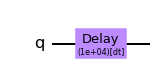

In [4]:
circuit = QuantumCircuit(1)
circuit.delay(10000, [0], unit="dt")
circuit.draw(output="mpl")

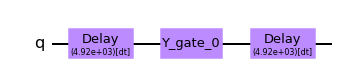

In [6]:
from qiskit.ignis.mitigation.dd.sequences import HahnSpinEchoDynamicalDecouplingSequence
from qiskit.ignis.mitigation.dd.passes import DelayToDynamicalDecouplingSequencePass
from qiskit.converters import dag_to_circuit, circuit_to_dag
from qiskit import transpile, schedule

dd_sequence = HahnSpinEchoDynamicalDecouplingSequence(backend)
transpiler_pass = DelayToDynamicalDecouplingSequencePass(
    dd_sequence, backend.properties(), backend.configuration().dt
)

dd_circuit = dag_to_circuit(transpiler_pass.run(circuit_to_dag(circuit)))
dd_circuit.draw(output="mpl")